# ATC40 - Capacity Spectrum Method

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import yaml

from streng.tools.bilin import Bilin
import streng.codes.eurocodes.ec8.cls.seismic_action.spectra as spec_ec8
from streng.codes.usa.atc40.cls.nl_static_analysis.csm import CapacitySpectrumMethod
from streng.codes.usa.atc40.cls.nl_static_analysis.csm import StructureProperties
from streng.codes.usa.atc40.cls.nl_static_analysis.csm import Demand



In [2]:
import os
print("Current working directory:", os.getcwd())
print("File exists:", os.path.exists('eres_dynamics_x.yaml'))

Current working directory: c:\MyPythonProjects\ihust\notebooks\csm
File exists: True


In [3]:
with open('eres_dynamics_x.yaml', 'r') as file:
    dynamics_data = yaml.safe_load(file)
    print("YAML content keys:", dynamics_data.keys())
    print("Full content:", dynamics_data)

YAML content keys: dict_keys(['m', 'phi', 'T0'])
Full content: {'m': [1239.562, 961.554, 687.12], 'phi': [6e-05, 0.61821, 1.0], 'T0': 0.17512}


In [4]:
bl = Bilin()
# bl.load_space_delimited(r'D:/MyBooks/TEI/RepairsExample/sapfiles/fema/PushoverCurve_modal.pushcurve', ' ')
bl.curve_ini.load_delimited(r'PushoverX_sapv16.csv', ' ')

with open('eres_dynamics_x.yaml', 'r') as file:
    dynamics_data = yaml.safe_load(file)

    m = np.array(dynamics_data['m'])
    φ_norm= np.array(dynamics_data['phi'])
    # φ_norm = φ#/φ[-1]
    T0 = dynamics_data['T0']


mystructure = StructureProperties(m = m,
                                  φ =φ_norm,
                                  T0 = T0,
                                  pushover_curve_F = bl.curve_ini.y,
                                  pushover_curve_δ = bl.curve_ini.x,
                                  behavior ='A')


In [5]:
T_range = np.linspace(1e-10, 4, 401)

mydemand = Demand(T_range=T_range,
                  Sa=None,
                  Sd=None,
                  TC=None)

mydemand.ec8_elastic(αgR=.24*9.81,
                          γI=1.0,
                          ground_type = 'C',
                          spectrum_type = 1,
                          η =1.0,
                          q=1.0,
                          β=0.2)

In [6]:
mycsm = CapacitySpectrumMethod(structure = mystructure,
                               demand = mydemand,
                               first_try_case = 'equal displacements')

In [7]:
print(f'PF1 = {mycsm.structure.PF1:.4f}')
print(f'α1 = {mycsm.structure.α1:.4f}')
print(f'φroof1 = {mycsm.structure.φroof1:.4f}')

PF1 = 1.2153
α1 = 0.5393
φroof1 = 1.0000


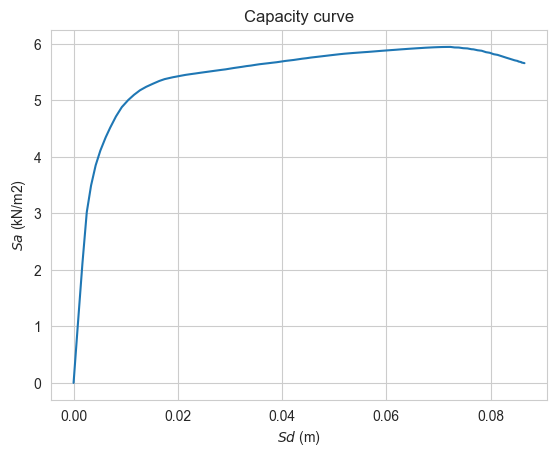

In [8]:
plt.plot(mycsm.structure.Sd, mycsm.structure.Sa)
plt.ylabel('$Sa$ (kN/m2)') 
plt.xlabel('$Sd$ (m)') #'μθpl'  
plt.title('Capacity curve')
plt.show()

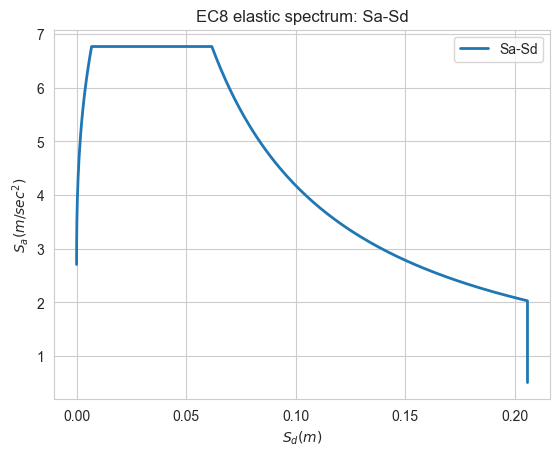

In [9]:
plt.plot(mycsm.demand.Sd, mycsm.demand.Sa, lw=2, label='Sa-Sd')
plt.ylabel('$S_{a} (m/sec^2)$') 
plt.xlabel('$S_{d} (m)$') 
plt.title('EC8 elastic spectrum: Sa-Sd')
plt.legend()
plt.show()

In [10]:
print(mycsm.Sd_first_try)

0.004863241641166242


In [11]:
mycsm.calc_performance_point()

Solution: Sd = 0.0587m, Sa = 5.8717g


{'Sd': np.float64(0.05870087056253868), 'Sa': np.float64(5.871696683354801)}

In [12]:
print(mycsm.output.to_markdown)

|   __iteration |        Sd |     error |
|--------------:|----------:|----------:|
|             0 | 4.863E-03 |           |
|             1 | 3.580E-03 | 2.639E-01 |
|             2 | 6.300E-03 | 7.600E-01 |
|             3 | 2.602E-03 | 5.871E-01 |
|             4 | 4.891E-02 | 1.780E+01 |
|             5 | 1.696E-03 | 9.653E-01 |
|             6 | 6.735E-02 | 3.870E+01 |
|             7 | 2.980E-03 | 9.557E-01 |
|             8 | 1.061E-02 | 2.560E+00 |
|             9 | 2.165E-03 | 7.960E-01 |
|            10 | 5.870E-02 | 2.612E+01 |
|            11 | 2.980E-03 | 9.492E-01 |
|            12 | 1.061E-02 | 2.560E+00 |
|            13 | 2.165E-03 | 7.960E-01 |
|            14 | 5.870E-02 | 2.612E+01 |
|            15 | 2.980E-03 | 9.492E-01 |
|            16 | 1.061E-02 | 2.560E+00 |
|            17 | 2.165E-03 | 7.960E-01 |
|            18 | 5.870E-02 | 2.612E+01 |
|            19 | 2.980E-03 | 9.492E-01 |
|            20 | 1.061E-02 | 2.560E+00 |
|            21 | 2.165E-03 | 7.96

In [13]:
mycsm.first_try_case = 'equal displacements'

In [14]:
mycsm.calc_performance_point()

Solution: Sd = 0.0587m, Sa = 5.8717g


{'Sd': np.float64(0.05870087056253868), 'Sa': np.float64(5.871696683354801)}

In [15]:
mycsm.output.to_panda_dataframe

,__iteration,Sd,error
0,0,0.004863,NaN
1,1,0.003580,0.263920
2,2,0.006300,0.760001
3,3,0.002602,0.587067
4,4,0.048912,17.800622
5,5,0.001696,0.965317
6,6,0.067347,38.699714
7,7,0.002980,0.955747
8,8,0.010610,2.559874
9,9,0.002165,0.795954
